In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

workplace_mental_health_data = pd.read_csv("survey.csv")

workplace_mental_health_data.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [3]:
# Get the unique answers in the 'tech_company' column
tech_company_unique = workplace_mental_health_data['tech_company'].unique()

# Calculate the counts for each unique answer in the 'tech_company' column
tech_company_counts = workplace_mental_health_data['tech_company'].value_counts()

# Calculate the percentage distribution for each unique answer in the 'tech_company' column
tech_company_percentage = workplace_mental_health_data['tech_company'].value_counts(normalize=True) * 100

# Print unique answers, counts, and percentages
print(tech_company_unique)
print(tech_company_counts)
print(tech_company_percentage)

['Yes' 'No']
Yes    1031
No      228
Name: tech_company, dtype: int64
Yes    81.890389
No     18.109611
Name: tech_company, dtype: float64


In [4]:
# Create a DataFrame to store the data
tech_company_table = pd.DataFrame({
    'Tech Company': tech_company_unique,
    'Count': tech_company_counts,
    'Percentage': tech_company_percentage
})

# Remove unwanted column
tech_company_clean_table = tech_company_table.to_string(index=False)

# Display the resulting table

print(tech_company_clean_table)

# Display the resulting table



Tech Company  Count  Percentage
         Yes   1031   81.890389
          No    228   18.109611


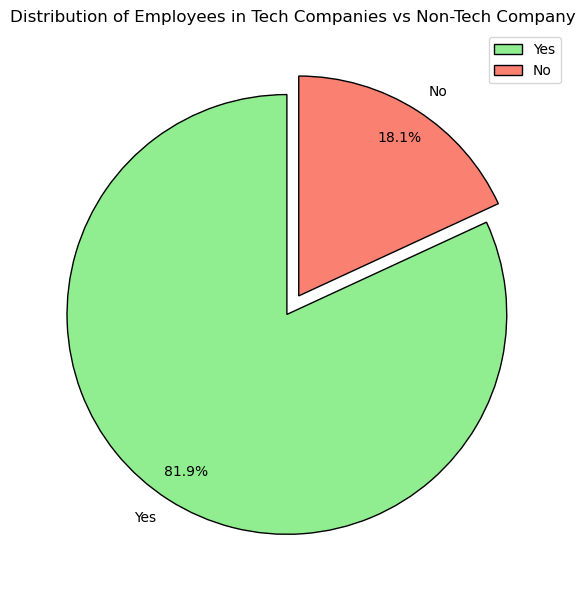

In [5]:
tech_company_counts = workplace_mental_health_data["tech_company"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6),) 

# Define colors for the pie chart
colors = ['lightgreen', 'salmon', ] 
outline_props = {'linewidth': 1, 'edgecolor': 'black'}

# Plot the pie chart with customizations
plt.pie(tech_company_counts, labels=tech_company_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0.05), wedgeprops=outline_props)

# Title and legend
plt.title("Distribution of Employees in Tech Companies vs Non-Tech Company")
plt.legend(tech_company_counts.index, loc='upper right')

# Show the plot
plt.tight_layout()  # Adjust spacing for better layout
plt.show()


In [6]:
# Filter the data for 'tech_company' == 'Yes' and 'No' separately
tech_yes_data = workplace_mental_health_data[workplace_mental_health_data['tech_company'] == 'Yes']
tech_no_data = workplace_mental_health_data[workplace_mental_health_data['tech_company'] == 'No']

# Calculate proportions for 'coworkers' within 'tech_company' groups
tech_yes_coworkers_proportions = tech_yes_data['coworkers'].value_counts(normalize=True) * 100
tech_no_coworkers_proportions = tech_no_data['coworkers'].value_counts(normalize=True) * 100

# Calculate proportions for 'supervisor' within 'tech_company' groups
tech_yes_supervisor_proportions = tech_yes_data['supervisor'].value_counts(normalize=True) * 100
tech_no_supervisor_proportions = tech_no_data['supervisor'].value_counts(normalize=True) * 100

# Print the calculated proportions
print("Tech Company: Yes - Coworkers Proportions:")
print(tech_yes_coworkers_proportions)

print("Tech Company: Yes - Supervisor Proportions:")
print(tech_yes_supervisor_proportions)

print("Tech Company: No - Coworkers Proportions:")
print(tech_no_coworkers_proportions)

print("Tech Company: No - Supervisor Proportions:")
print(tech_no_supervisor_proportions)

Tech Company: Yes - Coworkers Proportions:
Some of them    61.202716
No              19.689622
Yes             19.107662
Name: coworkers, dtype: float64
Tech Company: Yes - Supervisor Proportions:
Yes             42.095053
No              30.358875
Some of them    27.546072
Name: supervisor, dtype: float64
Tech Company: No - Coworkers Proportions:
Some of them    62.719298
No              25.000000
Yes             12.280702
Name: coworkers, dtype: float64
Tech Company: No - Supervisor Proportions:
Yes             35.964912
No              35.087719
Some of them    28.947368
Name: supervisor, dtype: float64


In [7]:
# Create a DataFrame to store the calculated proportions
proportions_data = pd.DataFrame({
    'Tech Company': ['Yes', 'Yes', 'No', 'No'],
    'Individual': ['Coworkers', 'Supervisor', 'Coworkers', 'Supervisor'],
    'Some of them': [
        tech_yes_coworkers_proportions.get('Some of them', 0),
        tech_yes_supervisor_proportions.get('Some of them', 0),
        tech_no_coworkers_proportions.get('Some of them', 0),
        tech_no_supervisor_proportions.get('Some of them', 0)
    ],
    'No': [
        tech_yes_coworkers_proportions.get('No', 0),
        tech_yes_supervisor_proportions.get('No', 0),
        tech_no_coworkers_proportions.get('No', 0),
        tech_no_supervisor_proportions.get('No', 0)
    ],
    'Yes': [
        tech_yes_coworkers_proportions.get('Yes', 0),
        tech_yes_supervisor_proportions.get('Yes', 0),
        tech_no_coworkers_proportions.get('Yes', 0),
        tech_no_supervisor_proportions.get('Yes', 0)
    ]
})

# Print the DataFrame
print(proportions_data)

  Tech Company  Individual  Some of them         No        Yes
0          Yes   Coworkers     61.202716  19.689622  19.107662
1          Yes  Supervisor     27.546072  30.358875  42.095053
2           No   Coworkers     62.719298  25.000000  12.280702
3           No  Supervisor     28.947368  35.087719  35.964912


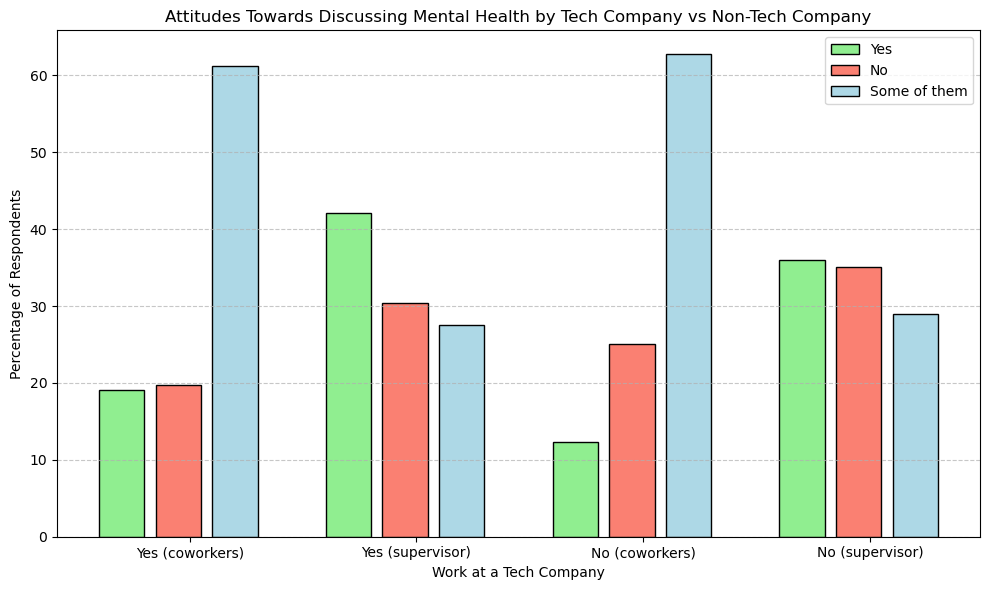

In [8]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Grouped bar chart
width = 0.2  # Width of each bar
spacing = .05
x = np.arange(len(proportions_data))  # x-axis positions

# Define colors for the bars
colors = ['lightgreen', 'salmon', 'lightblue']  # Customize colors based on your preference

# Plot the bars for 'Some of them', 'No', and 'Yes'
for i, category in enumerate(['Yes', 'No', 'Some of them']):
    ax.bar(x + (width + spacing) * i, proportions_data[category], width, label=category, color=colors[i], edgecolor='black')

# Modify x-axis tick labels to include category information
x_tick_labels = [
    f'{row["Tech Company"]} ({row["Individual"].lower()})' for _, row in proportions_data.iterrows()
]
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(x_tick_labels) 

ax.set_xlabel('Work at a Tech Company')
ax.set_ylabel('Percentage of Respondents')
ax.set_title('Attitudes Towards Discussing Mental Health by Tech Company vs Non-Tech Company')
ax.legend()

# Grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


In [9]:
# Create a contingency table for 'tech_company' vs. 'coworkers'
contingency_coworkers = pd.crosstab(workplace_mental_health_data['tech_company'], workplace_mental_health_data['coworkers'])

# Create a contingency table for 'tech_company' vs. 'supervisor'
contingency_supervisor = pd.crosstab(workplace_mental_health_data['tech_company'], workplace_mental_health_data['supervisor'])

# Perform the Chi-squared test for both contingency tables
chi2_coworkers, p_value_coworkers, dof_coworkers, expected_coworkers = chi2_contingency(contingency_coworkers)
chi2_supervisor, p_value_supervisor, dof_supervisor, expected_supervisor = chi2_contingency(contingency_supervisor)

# Print the results
print("Chi-squared test results for Coworkers:")
print("Chi-squared:", chi2_coworkers)
print("P-value:", p_value_coworkers)
print("Degrees of Freedom:", dof_coworkers)
print("Expected Frequencies:\n", expected_coworkers)

print("\nChi-squared test results for Supervisor:")
print("Chi-squared:", chi2_supervisor)
print("P-value:", p_value_supervisor)
print("Degrees of Freedom:", dof_supervisor)
print("Expected Frequencies:\n", expected_supervisor)

Chi-squared test results for Coworkers:
Chi-squared: 7.488739030401119
P-value: 0.0236505356512179
Degrees of Freedom: 2
Expected Frequencies:
 [[ 47.08498809 140.16838761  40.74662431]
 [212.91501191 633.83161239 184.25337569]]

Chi-squared test results for Supervisor:
Chi-squared: 3.181360128724292
P-value: 0.203786976338983
Degrees of Freedom: 2
Expected Frequencies:
 [[ 71.17077045  63.38363781  93.44559174]
 [321.82922955 286.61636219 422.55440826]]


In [10]:
# Create a dictionary to store the test results
coworker_supervisor_test_results = {
    'Chi-squared': [chi2_coworkers, chi2_supervisor],
    'P-value': [p_value_coworkers, p_value_supervisor ],
    'Degrees of Freedom': [dof_coworkers, dof_supervisor]
}

# Create a DataFrame
cw_sv_results_df = pd.DataFrame(coworker_supervisor_test_results, index=['Coworkers', 'Supervisor'])

# Display the DataFrame
print(cw_sv_results_df)

            Chi-squared   P-value  Degrees of Freedom
Coworkers      7.488739  0.023651                   2
Supervisor     3.181360  0.203787                   2


In [11]:
# Get the unique answers in the 'benefits' column
benefits_unique = workplace_mental_health_data['benefits'].unique()

# Calculate the counts for each unique answer in the 'benefits' column
benefits_counts = workplace_mental_health_data['benefits'].value_counts()

# Calculate the percentage distribution for each unique answer in the 'benefits' column
benefits_percentage = workplace_mental_health_data['benefits'].value_counts(normalize=True) * 100

# Print unique answers, counts, and percentages
print(benefits_unique)
print(benefits_counts)
print(benefits_percentage)

['Yes' "Don't know" 'No']
Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64
Yes           37.887212
Don't know    32.406672
No            29.706116
Name: benefits, dtype: float64


In [12]:
# Create a DataFrame to store the data
benefits_table = pd.DataFrame({
    'Benefits': benefits_unique,
    'Count': benefits_counts,
    'Percentage': benefits_percentage
})

# Display the resulting table
benefits_table_clean = benefits_table.to_string(index=False)
print(benefits_table_clean)

  Benefits  Count  Percentage
       Yes    477   37.887212
Don't know    408   32.406672
        No    374   29.706116


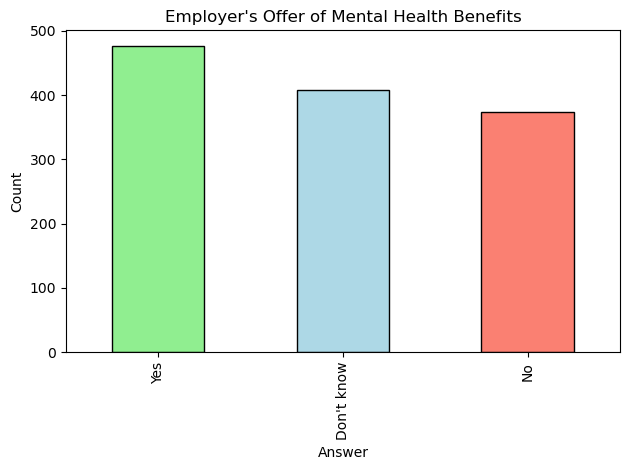

In [13]:
# Define custom colors for each bar
custom_colors = ['lightgreen', 'lightblue', 'salmon',]

# Create a bar plot with custom colors
ax = benefits_counts.plot(kind='bar', color=custom_colors, edgecolor='black')

# Add labels and title
plt.xlabel("Answer")
plt.ylabel("Count")
plt.title("Employer's Offer of Mental Health Benefits")

# Adjust layout and appearance
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# Filter the data for 'tech_company' == 'Yes' and 'No' separately
tech_yes_data = workplace_mental_health_data[workplace_mental_health_data['tech_company'] == 'Yes']
tech_no_data = workplace_mental_health_data[workplace_mental_health_data['tech_company'] == 'No']

# Calculate proportions for 'benefits' within 'tech_company' groups
tech_yes_benefits_proportions = tech_yes_data['benefits'].value_counts(normalize=True) * 100
tech_no_benefits_proportions = tech_no_data['benefits'].value_counts(normalize=True) * 100


# Print the calculated proportions
print("Do work for Tech Company: benefits Prorams offered")
print(tech_yes_benefits_proportions)

print("Do not work for Tech Company: benefits Prorams offered")
print(tech_no_benefits_proportions)


Do work for Tech Company: benefits Prorams offered
Yes           36.178468
Don't know    32.492726
No            31.328807
Name: benefits, dtype: float64
Do not work for Tech Company: benefits Prorams offered
Yes           45.614035
Don't know    32.017544
No            22.368421
Name: benefits, dtype: float64


In [15]:

# Create a DataFrame to store the calculated proportions
tech_benefits_proportions_data = pd.DataFrame({
    'Tech Company': ['Yes', 'No',],
    'Yes': [
        tech_yes_benefits_proportions.get('Yes', 0),
        tech_no_benefits_proportions.get('Yes', 0),
        
    ],
    'No': [
        tech_yes_benefits_proportions.get('No', 0),
        tech_no_benefits_proportions.get('No', 0),
    ],
    'Don\'t know': [
        tech_yes_benefits_proportions.get('Don\'t know', 0),
        tech_no_benefits_proportions.get('Don\'t know', 0),
    ]
})

# Print the DataFrame
print(tech_benefits_proportions_data)

  Tech Company        Yes         No  Don't know
0          Yes  36.178468  31.328807   32.492726
1           No  45.614035  22.368421   32.017544


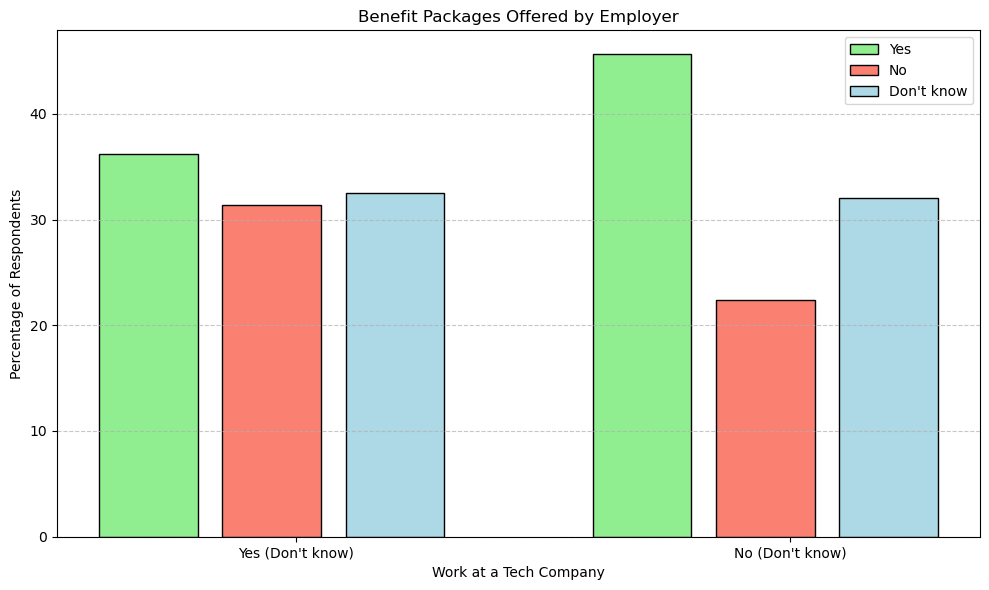

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Grouped bar chart
width = 0.2  # Width of each bar
spacing = 0.05
x = np.arange(len(tech_benefits_proportions_data))  # x-axis positions

# Define colors for the bars
colors = ['lightgreen', 'salmon', 'lightblue']  # Customize colors based on your preference

# Plot the bars for "Don't know", 'No', and 'Yes'
for i, category in enumerate(["Yes", 'No', 'Don\'t know']):
    ax.bar(x + (width + spacing) * i, tech_benefits_proportions_data[category], width, label=category, color=colors[i], edgecolor='black')

# Modify x-axis tick labels to include category information
x_tick_labels = [f'{row["Tech Company"]} ({category})' for _, row in tech_benefits_proportions_data.iterrows()]
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(x_tick_labels)

x_tick_labels = [f'{row["Tech Company"]} ({category})' if category != 'Yes' and category != 'No' else f'{row["Tech Company"]}' for _, row in tech_benefits_proportions_data.iterrows()]
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(x_tick_labels)

ax.set_xlabel('Work at a Tech Company')
ax.set_ylabel('Percentage of Respondents')
ax.set_title('Benefit Packages Offered by Employer')
ax.legend()

# Grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


In [17]:
# Create a contingency table for 'tech_company' vs. 'benefits'
contingency_benefits = pd.crosstab(workplace_mental_health_data['tech_company'], workplace_mental_health_data['benefits'])

# Perform the Chi-squared test for both contingency tables
chi2_benefits, p_value_benefits, dof_benefits, expected_benefits = chi2_contingency(contingency_benefits)

# Print the results
print("Chi-squared test results for benefits:")
print("Chi-squared:", chi2_benefits)
print("P-value:", p_value_benefits)
print("Degrees of Freedom:", dof_benefits)
print("Expected Frequencies:\n", expected_benefits)


Chi-squared test results for benefits:
Chi-squared: 9.446775722067576
P-value: 0.008885026267135138
Degrees of Freedom: 2
Expected Frequencies:
 [[ 73.88721207  67.7299444   86.38284353]
 [334.11278793 306.2700556  390.61715647]]


In [18]:
# Create a dictionary to store the test results
benefits_test_results = {
    'Chi-squared': [chi2_benefits],
    'P-value': [p_value_benefits],
    'Degrees of Freedom': [dof_benefits]
}

# Create a DataFrame
benefits_results_df = pd.DataFrame(benefits_test_results, index=['benefits'])

# Display the DataFrame
print(benefits_results_df)

          Chi-squared   P-value  Degrees of Freedom
benefits     9.446776  0.008885                   2
